In [50]:
import glob, os
import sklearn as sk
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

#veriyukleme
epilepsy=pd.read_csv("epilepsi.csv")
epilepsy

,Unnamed: 0,treatment,base,age,seizure.rate,period,subject
0,1,placebo,11,31,5,1,1
1,110,placebo,11,31,3,2,1
2,112,placebo,11,31,3,3,1
3,114,placebo,11,31,3,4,1
4,2,placebo,11,30,3,1,2
...,...,...,...,...,...,...,...
231,583,Progabide,13,36,0,4,58
232,59,Progabide,12,37,1,1,59
233,591,Progabide,12,37,4,2,59
234,592,Progabide,12,37,3,3,59


In [51]:
from sklearn.utils import shuffle

conditions=['base','age','seizure.rate','period']
X=epilepsy[conditions]
y = epilepsy['treatment']

# set labels as 0 or 1
y = y.map(dict(placebo=1, Progabide=0))

In [52]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
X_train

,base,age,seizure.rate,period
227,25,21,1,4
222,22,26,19,3
126,10,30,1,3
198,22,32,2,3
107,10,19,2,4
...,...,...,...,...
67,18,28,3,4
192,151,22,102,1
117,38,32,7,2
47,33,24,4,4


## K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

print ("Training ...")
start = datetime.now()
knn = KNeighborsClassifier(n_neighbors=2,metric='minkowski')
knn.fit(X_train, y_train)
end = datetime.now()
c = end - start
print("KNN training took "+ str(c.microseconds) + " microseconds")

Training ...
KNN training took 1016 microseconds


In [54]:
print ("Testing:")
y_pred = knn.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))


Testing:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.91      0.78      0.84        27

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.87      0.86      0.86        59

Accuracy: 0.864
Confusion matrix:
[[30  2]
 [ 6 21]]


## Support Vector Machines

In [55]:
from sklearn.svm import SVC
start = datetime.now()
svc=SVC(kernel="rbf",gamma="auto")
print ("Training ...")
svc.fit(X_train,y_train)
end = datetime.now()
c = end - start
print("SVM training took "+ str(c.microseconds) + " microseconds")

Training ...
SVM training took 1967 microseconds


In [56]:
print ("Testing:")
y_pred = svc.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))

Testing:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.96      0.85      0.90        27

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59

Accuracy: 0.915
Confusion matrix:
[[31  1]
 [ 4 23]]


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

start = datetime.now()
logr=LogisticRegression(solver='lbfgs',C=50)
print ("Training ...")
logr.fit(X_train,y_train)
end = datetime.now()
c = end - start 
print("Logistic regression took "+ str(c.microseconds) + " microseconds")

Training ...
Logistic regression took 4988 microseconds


In [58]:
print ("Testing:")
y_pred = logr.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))
print("")

Testing:
              precision    recall  f1-score   support

           0       0.59      0.62      0.61        32
           1       0.52      0.48      0.50        27

    accuracy                           0.56        59
   macro avg       0.55      0.55      0.55        59
weighted avg       0.56      0.56      0.56        59

Accuracy: 0.559
Confusion matrix:
[[20 12]
 [14 13]]



## Gaussian Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

start = datetime.now()
gnb=GaussianNB()
print ("Training ...")
gnb.fit(X_train,y_train)
end = datetime.now()
c = start - end
print("Gaussian Naive Bayes training took "+ str(c.microseconds) + " microseconds")

Training ...
Gaussian Naive Bayes training took 999003 microseconds


In [60]:
print ("Testing:")
y_pred = gnb.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))
print("")

Testing:
              precision    recall  f1-score   support

           0       0.57      0.12      0.21        32
           1       0.46      0.89      0.61        27

    accuracy                           0.47        59
   macro avg       0.52      0.51      0.41        59
weighted avg       0.52      0.47      0.39        59

Accuracy: 0.475
Confusion matrix:
[[ 4 28]
 [ 3 24]]



## Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
np.set_printoptions(precision=2)


clf = KNeighborsClassifier(n_neighbors = 2, metric = "minkowski")
cv_scores = cross_val_score(clf, X_train, y_train)

print('Çapraz Sağlama skor (3-kat):', cv_scores)
print('Ortalama çapraz sağlama skor (3-kat): {:.3f}'
     .format(np.mean(cv_scores)))

Çapraz Sağlama skor (3-kat): [0.75 0.83 0.84]
Ortalama çapraz sağlama skor (3-kat): 0.808


C:\Users\soner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [76]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X_train, y_train,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [77]:
print(train_scores)

[[0.71 0.64 0.61]
 [0.96 0.98 0.98]
 [1.   1.   1.  ]
 [1.   1.   1.  ]]


In [78]:
print(test_scores)

[[0.58 0.56 0.55]
 [0.73 0.81 0.71]
 [0.52 0.53 0.52]
 [0.52 0.53 0.52]]


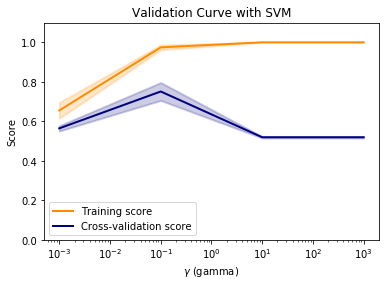

In [79]:
import matplotlib.pyplot as plt
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## ROC Curve 

gamma = 0.01  doğruluk = 0.75   AUC = 0.84
gamma = 0.10  doğruluk = 0.88   AUC = 0.96
gamma = 0.20  doğruluk = 0.92   AUC = 0.95
gamma = 1.00  doğruluk = 0.76   AUC = 0.90


C:\Users\soner\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


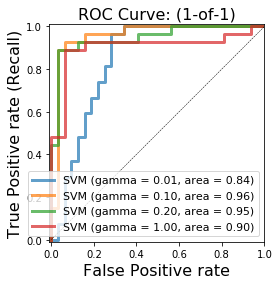

In [80]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  doğruluk = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive rate', fontsize=16)
plt.ylabel('True Positive rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC Curve: (1-of-1)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()